In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

from minsv import *
from errorbound import *
from gencorrup import *
from qrk1 import *
from qrk2 import *
from noisyRK import *
from thm25 import *

In [2]:
#Matrix dimensions
m = 20000
n = 100

#Vary the matrix type
A_t = np.random.randn(m,n)
#A_t = np.random.uniform(size=(m,n))
#A_t = np.random.binomial(1,0.5,size=(m,n))

#Create the solution equation
A_n = normalize(A_t)
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

q = 0.8

e_0 = np.linalg.norm(-1*x_t)**2

In [3]:
#Compute sigma values

sigmin = minSV2(A_n,q,b)
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [5]:
#Corruption size + rate manipulation
b = 0.0001
csize = 10000
num = 10000
iters = list(range(num))

#Noise parameters
sig = 0

In [ ]:
#Generate errors

errors1 = error_bound_crl_1(A_n,x_t,q,b,0.00003,q,num)

In [ ]:
errors2 = error_bound_crl_2(A_n,x_t,q,b,0.00001,q,num)

In [4]:
errors3 = error_bound_crl_3(A_n,x_t,q,b,0.00001,q,num)

In [6]:
kacz_experiment = QuantileRK1_ex(A_n,x_t,b_t,q,m,b,csize,num)

In [7]:
kacz_experiment_2 = QuantileRK2_ex(A_n,x_t,b_t,q,m,b,csize,num)

In [8]:
kacz_experiment_3 = QuantileRK2_ex_n(A_n,x_t,b_t,q,m,b,csize,0.00001,num)

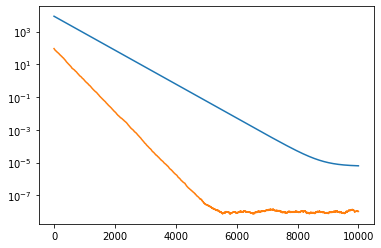

In [9]:
#plt.semilogy(iters,errors1)
#plt.semilogy(iters,errors2)
plt.semilogy(iters,errors3)
plt.semilogy(kacz_experiment_3[1],kacz_experiment_3[2])